# Hello GeoPandas, Alaaf Aachen!


In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let us load a dataset containing the statistical neighbourhoods of Aachen. It is located in the `/data/aachen` directory from where this notebook is located. GeoPandas supports a wide range of GIS data formats including Shape file (usually ending on .shp).

In [3]:
bezirke = gpd.read_file("./data/aachen/StatistischeBezirkeAachen.shp")

GeoPandas now has loaded the data from the shapefile with its geometric information and the data on the attributes of the shape into a table. We can inspect the table using the `plot()` function offered by the GeoPandas DataFrame.

In [4]:
bezirke.head()

,STATBEZ,ST_NAME,FLäcHE,geometry
0,66,Richterich,0.0,"POLYGON Z ((293978.448 5632501.771 0.000, 2939..."
1,65,Laurensberg,0.0,"POLYGON Z ((294442.636 5632624.614 0.000, 2946..."
2,64,Vaalserquartier,0.0,"POLYGON Z ((292517.589 5630097.711 0.000, 2923..."
3,53,Haaren,0.0,"POLYGON Z ((296303.284 5631685.869 0.000, 2964..."
4,17,Hanbruch,0.0,"POLYGON Z ((292455.974 5628211.006 0.000, 2924..."


<AxesSubplot:>

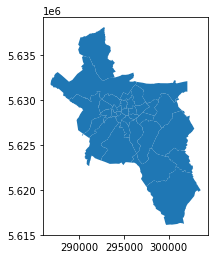

In [5]:
bezirke.plot()

So far, the data contained in the data set is not very interesting: just the shapes of the borders, an identificator  ("STATBEZ") to identify the area and the name stored in the column ("ST_NAME").

<AxesSubplot:>

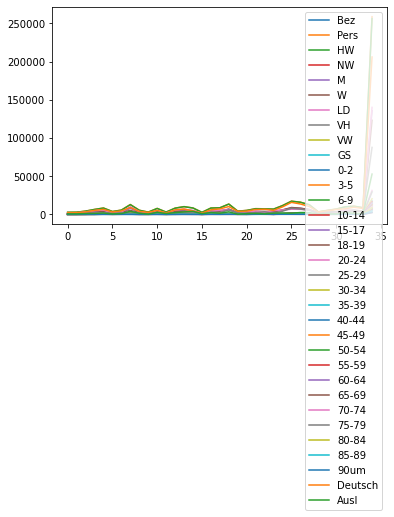

In [6]:
statistics = pd.read_csv("./data/aachen/einwohnerstatistik-31.12.2020.csv")
statistics.head()
statistics.plot()

This is a plain CSV Table that has no geographic information attached to it. However, the two DataFrames have a feature in common: the **`id`** of the area. The column names differ, they are the same entity though. Let's order the tables by the respective id and see whether they match.


In [8]:
sorted_stats = statistics.sort_values(by='StatBezName')
sorted_stats.head()

,Bez,StatBezName,Pers,HW,NW,M,W,LD,VH,VW,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90um,Deutsch,Ausl
13,32.0,Adalbertsteinweg,10125,10059,66,5828,4297,6850,2152,370,...,494,415,291,262,193,213,106,62,6934,3191
19,41.0,Beverau,4226,4163,63,2070,2156,1687,2042,253,...,441,349,241,182,158,205,111,55,3967,259
25,51.0,Brand,17296,17171,125,8336,8960,6709,8010,1132,...,1538,1270,1048,887,809,767,403,137,15701,1595
20,42.0,Burtsch. Kurgarten,5198,5132,66,2733,2465,3335,1325,195,...,301,221,212,146,136,164,78,50,4270,928
21,43.0,Burtscheider Abtei,7531,7339,192,3908,3623,4318,2213,429,...,501,440,331,314,302,291,145,81,6328,1203


In [9]:
sorted_bezirke = bezirke.sort_values(by='ST_NAME')
sorted_bezirke.head()

,STATBEZ,ST_NAME,FLäcHE,geometry
29,32,Adalbertsteinweg,0.0,"POLYGON Z ((295545.769 5629065.660 0.000, 2955..."
19,41,Beverau,0.0,"POLYGON Z ((296424.458 5624064.970 0.000, 2964..."
16,51,Brand,0.0,"POLYGON Z ((299541.907 5623729.670 0.000, 2994..."
31,42,Burtsch. Kurgarten,0.0,"POLYGON Z ((295508.473 5628264.253 0.000, 2955..."
20,43,Burtscheider Abtei,0.0,"POLYGON Z ((295463.104 5627151.493 0.000, 2955..."


With this information we can add the information from the extended statistics DataFrame we have assigned in `statistics` to the GeoDataFrame. Here, every column of the `statistics` data set is added to the table. With tabular data, this concept is referred to as **merging** or **joining** data. 

See a general explanation of merging data frames here
See an explanation on merging GeoDataFrames here https://geopandas.org/docs/user_guide/mergingdata.html 

Here, we are joining the `statistics` data frame to the `bezirke` data from the left

```
bezirke <-- statistics
```


First however, we have to rename the column name `Bez` from the `statistics` DataFrame to match the respective name `STATBEZ` in our `bezirke` DataFrame

In [10]:
statistics = statistics.rename(columns = {'Bez' : 'STATBEZ'})
statistics.head(3)



,STATBEZ,StatBezName,Pers,HW,NW,M,W,LD,VH,VW,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90um,Deutsch,Ausl
0,10.0,Markt,2713,2668,45,1603,1110,2006,485,75,...,107,95,74,56,54,60,28,15,2011,702
1,13.0,Theater,2833,2800,33,1620,1213,2021,547,105,...,121,101,86,85,78,84,35,27,2197,636
2,14.0,Lindenplatz,4281,4218,63,2347,1934,3219,678,181,...,161,130,120,95,101,115,92,63,3230,1051


**inital attempt will result in an error. This is expected, see below for explanation and solution**  

bezirke_stats  = bezirke.merge(statistics, on='STATBEZ', how='left')

In [11]:
#pd.to_numeric(statistics["STATBEZ"])
import numpy as np
statistics = statistics.replace(r'^\s*$', np.nan, regex=True)
index = statistics[statistics['STATBEZ'] == np.nan].index
#statistics.drop(34, inplace=True)
statistics.head()

,STATBEZ,StatBezName,Pers,HW,NW,M,W,LD,VH,VW,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90um,Deutsch,Ausl
0,10.0,Markt,2713,2668,45,1603,1110,2006,485,75,...,107,95,74,56,54,60,28,15,2011,702
1,13.0,Theater,2833,2800,33,1620,1213,2021,547,105,...,121,101,86,85,78,84,35,27,2197,636
2,14.0,Lindenplatz,4281,4218,63,2347,1934,3219,678,181,...,161,130,120,95,101,115,92,63,3230,1051
3,15.0,St. Jakob,6473,6400,73,3645,2828,4861,1134,148,...,266,211,168,138,88,93,45,16,5195,1278
4,16.0,Westpark,8332,8216,116,4586,3746,5659,2009,295,...,350,364,249,185,174,192,115,57,6581,1751


Next we have an example for using NumPy dtype. Here we define the column content for __STATBEZ__ as type integer64. Integer, as we want them to be hole numbers not floating point numbers and 64 defines the size of date, here 64 bytes.

In [12]:
statistics["STATBEZ"] = statistics["STATBEZ"].fillna(0)
statistics["STATBEZ"] = statistics["STATBEZ"].astype('int64')

statistics["STATBEZ"].tail()

30    63
31    64
32    65
33    66
34     0
Name: STATBEZ, dtype: int64

In [13]:
# inital attempt will result in an error. This is expected, see below for explanation and solution
bezirke_stats  = bezirke.merge(statistics, on='STATBEZ', how='left')
# bezirke_stats = bezirke.set_index('STATBEZ').join(statistics.set_index('STATBEZ'))
bezirke_stats.tail(3)
bezirke_stats = gpd.GeoDataFrame(bezirke_stats)
type(bezirke_stats)
bezirke_stats.head()

,STATBEZ,ST_NAME,FLäcHE,geometry,StatBezName,Pers,HW,NW,M,W,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90um,Deutsch,Ausl
0,66,Richterich,0.0,"POLYGON Z ((293978.448 5632501.771 0.000, 2939...",Richterich,8674,8590,84,4245,4429,...,732,706,624,498,410,405,160,66,7692,982
1,65,Laurensberg,0.0,"POLYGON Z ((294442.636 5632624.614 0.000, 2946...",Laurensberg,10702,10585,117,5334,5368,...,816,677,571,523,502,499,316,214,9384,1318
2,64,Vaalserquartier,0.0,"POLYGON Z ((292517.589 5630097.711 0.000, 2923...",Vaalserquartier,9946,9796,150,5267,4679,...,598,601,538,412,273,231,118,61,7329,2617
3,53,Haaren,0.0,"POLYGON Z ((296303.284 5631685.869 0.000, 2964...",Haaren,12592,12482,110,6438,6154,...,926,808,625,558,490,464,246,109,10269,2323
4,17,Hanbruch,0.0,"POLYGON Z ((292455.974 5628211.006 0.000, 2924...",Hanbruch,3714,3690,24,1824,1890,...,300,253,232,155,129,140,89,46,3136,578


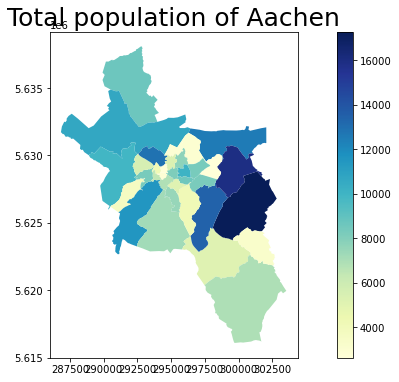

In [14]:
# set to min and max of data
vmin, vmax = 0, 133623

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(14,6))
# add a title and annotation
ax.set_title('Total population of Aachen', fontdict={'fontsize': '25', 'fontweight' : '3'})

ax = bezirke_stats.plot(column='Pers', cmap = 'YlGnBu', ax=ax,   
                                legend =  
                                  True)

In [15]:
print(bezirke_stats[1:5]["geometry"].area)

1    2.138610e+07
2    8.584376e+06
3    8.455279e+06
4    2.371349e+06
dtype: float64


In [16]:
bezirke_stats['popdens'] = bezirke_stats["Pers"] / bezirke_stats["geometry"].area*1000

In [17]:
bezirke_stats.head()

,STATBEZ,ST_NAME,FLäcHE,geometry,StatBezName,Pers,HW,NW,M,W,...,60-64,65-69,70-74,75-79,80-84,85-89,90um,Deutsch,Ausl,popdens
0,66,Richterich,0.0,"POLYGON Z ((293978.448 5632501.771 0.000, 2939...",Richterich,8674,8590,84,4245,4429,...,706,624,498,410,405,160,66,7692,982,0.657729
1,65,Laurensberg,0.0,"POLYGON Z ((294442.636 5632624.614 0.000, 2946...",Laurensberg,10702,10585,117,5334,5368,...,677,571,523,502,499,316,214,9384,1318,0.500419
2,64,Vaalserquartier,0.0,"POLYGON Z ((292517.589 5630097.711 0.000, 2923...",Vaalserquartier,9946,9796,150,5267,4679,...,601,538,412,273,231,118,61,7329,2617,1.158617
3,53,Haaren,0.0,"POLYGON Z ((296303.284 5631685.869 0.000, 2964...",Haaren,12592,12482,110,6438,6154,...,808,625,558,490,464,246,109,10269,2323,1.489247
4,17,Hanbruch,0.0,"POLYGON Z ((292455.974 5628211.006 0.000, 2924...",Hanbruch,3714,3690,24,1824,1890,...,253,232,155,129,140,89,46,3136,578,1.566197


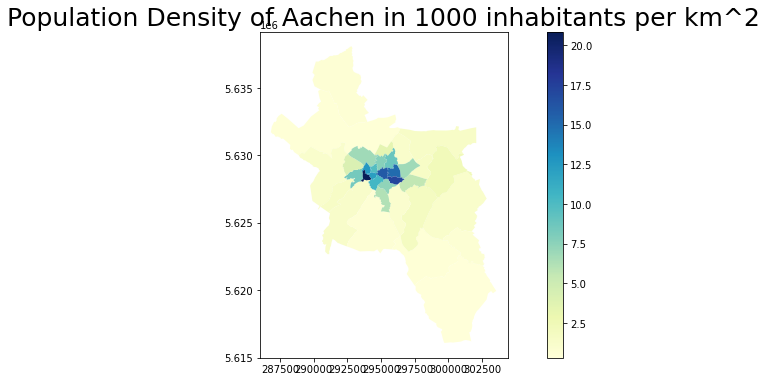

In [18]:
# set to min and max of data
vmin, vmax = 0, 133623

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(14,6))
# add a title and annotation
ax.set_title('Population Density of Aachen in 1000 inhabitants per km^2', fontdict={'fontsize': '25', 'fontweight' : '3'})

ax = bezirke_stats.plot(column='popdens', cmap = 'YlGnBu', ax=ax,   
                                legend =  
                                  True)

In [21]:
from ipyleaflet import Map, GeoData, basemaps, LayersControl
m = Map(center=(46.91, 7.43), zoom=15, basemap= basemaps.Esri.WorldTopoMap)
m


Map(center=[46.91, 7.43], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [22]:
m = Map(center=(52.3,8.0), zoom = 3, basemap= basemaps.Esri.WorldTopoMap)

In [23]:
m


Map(center=[52.3, 8.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_…